# MNIST - binary classification problem
Train a deep network to classify MNIST dataset into two classes, deciding
whether a digit in the image is greater (or equal to) or less than three (3), i.e. digit >= 3 or digit <3.

Preprocessing on data:
- Downsample the original images to 14 x 14 pixels
- Blurring the images

The network architecture has 1-3 batch-normalized CNN layers (with 3x3xN kernels,
where N is an adjustable parameter) and 2x2 strides with zero padding followed by a single fully
connected layer. We would like infer
how many CNN layers (1, 2 or 3) results in the best performance of the network based on the
database we have.

### The training details
After importing the necessary packages and the dataset, I resized all images and blurred the images of training data.
After that I redefined the target vector by thresholding it. Then I defined the architecture of neural network in three settings. In the first setting shown as "model1" I used only one CNN layer, in the second setting shown as "model2", I used two CNN layers and in the third setting shown as "model3", I used three CNN layers.
For compiling the all three models, I used binary cross entropy loss that is suitable for binary classification. For the optimization algorithm, I used Adam optimizer that combines ideas from both momentum and RMSprop optimization methods (using weighted average of squared gradients, and adaptive learning rate.)
After complining the models, I reshaped the training and testing data for the keras model and trained the models over 20 epochs and saved the results.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Downsample the original images to 14 x 14 pixels and blurring the training images:

In [3]:
# from scipy import misc
new_shape = (14,14)
x_train = np.empty(shape=(X_train.shape[0],)+new_shape)
x_test = np.empty(shape=(X_test.shape[0],)+new_shape)
for idx in range(X_train.shape[0]):
    x_train[idx] = cv2.resize(cv2.blur(X_train[idx],(5,5)),(14,14))
for idx in range(X_test.shape[0]):
    x_test[idx] = cv2.resize(cv2.blur(X_test[idx],(5,5)),(14,14))
    


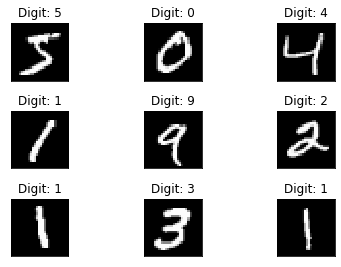

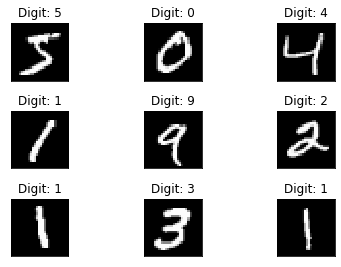

In [4]:
#original images

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

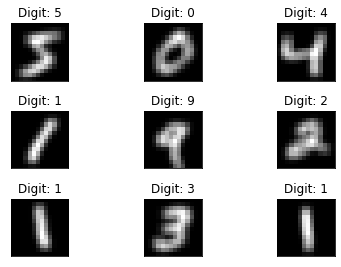

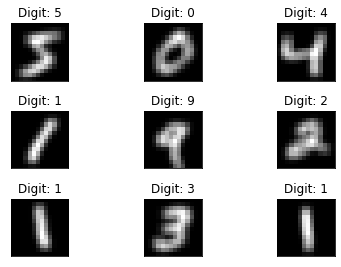

In [5]:
#blurred images

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(Y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
y_train = Y_train >= 3
y_train.astype(np.int)
y_test = Y_test >= 3
y_test.astype(np.int)

array([1, 0, 0, ..., 1, 1, 1])

In [7]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3),strides=(2, 2), padding='same', activation='relu', input_shape=(14, 14,1)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [8]:
model1.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3),strides=(2, 2), padding='same', activation='relu', input_shape=(14, 14,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),strides=(2, 2), padding='valid', activation='relu'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [10]:
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [11]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3),strides=(2, 2), padding='same', activation='relu', input_shape=(14, 14,1)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3),strides=(2, 2), padding='valid', activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3),strides=(2, 2), padding='valid', activation='relu'))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(10, activation='relu'))
model3.add(Dense(1))
model3.add(Activation('sigmoid'))

In [12]:
model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [13]:
train_X = x_train.reshape(x_train.shape[0],14, 14,1).astype('float32')
test_X = x_test.reshape(x_test.shape[0],14, 14,1).astype('float32')

In [14]:
# training the model and saving metrics in history
history1 = model1.fit(train_X, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(test_X, y_test))
history2 = model2.fit(train_X, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(test_X, y_test))
history3 = model3.fit(train_X, y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(test_X, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.0914 - accuracy: 0.9654 - val_loss: 0.0423 - val_accuracy: 0.9851
Epoch 2/20
 - 3s - loss: 0.0384 - accuracy: 0.9866 - val_loss: 0.0379 - val_accuracy: 0.9875
Epoch 3/20
 - 3s - loss: 0.0311 - accuracy: 0.9893 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 4/20
 - 3s - loss: 0.0258 - accuracy: 0.9910 - val_loss: 0.0260 - val_accuracy: 0.9919
Epoch 5/20
 - 3s - loss: 0.0231 - accuracy: 0.9919 - val_loss: 0.0354 - val_accuracy: 0.9880
Epoch 6/20
 - 3s - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0223 - val_accuracy: 0.9932
Epoch 7/20
 - 3s - loss: 0.0192 - accuracy: 0.9932 - val_loss: 0.0251 - val_accuracy: 0.9919
Epoch 8/20
 - 3s - loss: 0.0164 - accuracy: 0.9939 - val_loss: 0.0244 - val_accuracy: 0.9925
Epoch 9/20
 - 3s - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 10/20
 - 3s - loss: 0.0153 - accuracy: 0.9945 - val_loss: 0.0257 - val_accuracy: 0.9926
Epoch 11/20
 - 3s -

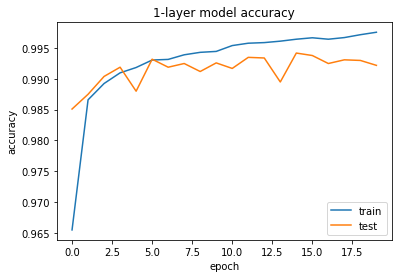

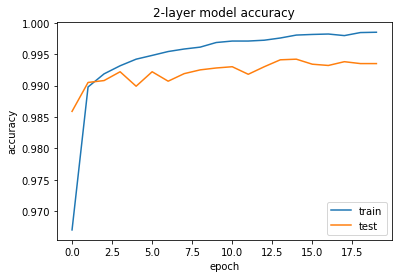

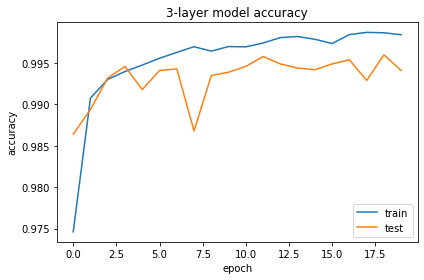

In [15]:
fig = plt.figure()
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('1-layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


fig = plt.figure()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('2-layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

fig = plt.figure()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('3-layer model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.tight_layout()



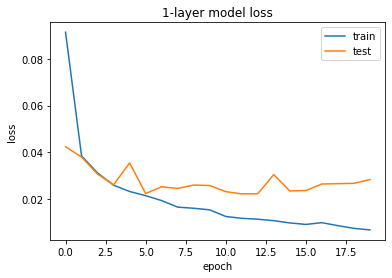

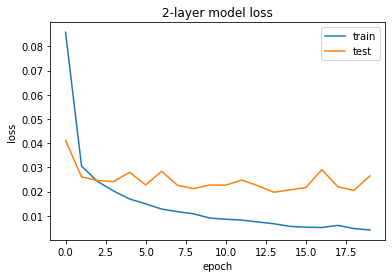

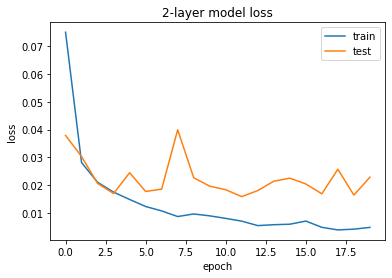

In [16]:

fig = plt.figure()
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('1-layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

fig = plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('2-layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

fig = plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('2-layer model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')



In [17]:
loss_and_metrics1 = model1.evaluate(test_X, y_test, verbose=2)

print("Test Loss", loss_and_metrics1[0])
print("Test Accuracy", loss_and_metrics1[1])

Test Loss 0.02824796690190342
Test Accuracy 0.9922000169754028


In [18]:
loss_and_metrics2 = model2.evaluate(test_X, y_test, verbose=2)

print("Test Loss", loss_and_metrics2[0])
print("Test Accuracy", loss_and_metrics2[1])

Test Loss 0.026471530812084962
Test Accuracy 0.9934999942779541


In [19]:
loss_and_metrics3 = model3.evaluate(test_X, y_test, verbose=2)

print("Test Loss", loss_and_metrics3[0])
print("Test Accuracy", loss_and_metrics3[1])

Test Loss 0.02284770342374468
Test Accuracy 0.9940999746322632
